# TO PREDICT WETHER IT WILL RAIN TOMORROW OR NOT (YES OR NO) Classification problem

In [1]:
#import required libraries
import pandas as pd #for data processing and reading
import numpy as np #for linear algebra processing

In [2]:
#loading the csv file
df=pd.read_csv('ausraindata.csv')

In [3]:
#Displaying data, using df.head() or print(df[0:5])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
#Rain Tomorrow is our Target Variable or Predicted variable
#we have Preictor variable

In [5]:
print('The size of the dataframe is:', df.shape)

The size of the dataframe is: (142193, 24)


In [6]:
#Checking Null Values,data preprocessing
print(df.count().sort_values())

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64


In [7]:
#if you look at above,the first 4 columns have less than 60% data, so we will ignore them by dropping them

#we don't need the location data, since we want to find if it rains in Australia and not in different locations

In [8]:
df=df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Date','Location','RISK_MM'],axis=1)

In [9]:
#DATA PREPROCESSING
#Checking for null Values again
print(df.count().sort_values()) 

Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
Rainfall         140787
RainToday        140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
RainTomorrow     142193
dtype: int64


In [10]:
#to remove any null values
df=df.dropna(how='any')

In [11]:
print(df.shape)

(112925, 17)


In [12]:
#TO REMOVE OUTLIERS,INCONSISTENT OR INAPPROPRIATE DATA
#Using z score

from scipy import stats
z=np.abs(stats.zscore(df._get_numeric_data()))
print(z)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]


In [13]:
df=df[(z<3).all(axis=1)]
print(df.shape)

(107868, 17)


In [14]:
#LET'S DEAL WITH CATEGORICAL DATA

#changing yes/no to 1/0 for RainToday and RainTomorrow. 

df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [15]:
#let's convert unique value columns to int, i.e character values that are not consistent

categorical_columns=['WindGustDir','WindDir9am','WindDir3pm']
for col in categorical_columns:
    print(np.unique(df[col]))

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [16]:
#NORMALIZING OUR DATA SET for all the values to be in similar range, like 

df=pd.get_dummies(df, columns=categorical_columns)
print(df.iloc[4:9])

   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4     17.5     32.3       1.0           41.0           7.0          20.0   
5     14.6     29.7       0.2           56.0          19.0          24.0   
6     14.3     25.0       0.0           50.0          20.0          24.0   
7      7.7     26.7       0.0           35.0           6.0          17.0   
8      9.7     31.9       0.0           80.0           7.0          28.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_NNW  \
4         82.0         33.0       1010.8       1006.0  ...               0   
5         55.0         23.0       1009.2       1005.4  ...               0   
6         49.0         19.0       1009.6       1008.2  ...               0   
7         48.0         19.0       1013.4       1010.1  ...               0   
8         42.0          9.0       1008.9       1003.6  ...               0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_

In [17]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler.fit(df)
df=pd.DataFrame(scaler.transform(df),index=df.index,columns=df.columns)
print(df.iloc[4:10])

    MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4  0.628342  0.696296  0.035714       0.465753      0.135135      0.428571   
5  0.550802  0.632099  0.007143       0.671233      0.459459      0.523810   
6  0.542781  0.516049  0.000000       0.589041      0.486486      0.523810   
7  0.366310  0.558025  0.000000       0.383562      0.108108      0.357143   
8  0.419786  0.686420  0.000000       1.000000      0.135135      0.619048   
9  0.510695  0.641975  0.050000       0.287671      0.351351      0.214286   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_NNW  \
4     0.797753         0.33     0.342043     0.282974  ...             0.0   
5     0.494382         0.23     0.304038     0.268585  ...             0.0   
6     0.426966         0.19     0.313539     0.335731  ...             0.0   
7     0.415730         0.19     0.403800     0.381295  ...             0.0   
8     0.348315         0.09     0.296912     0.225420  ...     

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
X=df.loc[:,df.columns!='RainTomorrow']
Y=df[['RainTomorrow']]
selector=SelectKBest(chi2,k=3)
selector.fit(X,Y)
X_new=selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [19]:
df=df[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]

X=df[['Humidity3pm']]

Y=df[['RainTomorrow']]

In [47]:
X, Y

(        Humidity3pm
 0              0.22
 1              0.25
 2              0.30
 3              0.16
 4              0.33
 ...             ...
 142188         0.27
 142189         0.24
 142190         0.21
 142191         0.24
 142192         0.24
 
 [107868 rows x 1 columns],         RainTomorrow
 0                0.0
 1                0.0
 2                0.0
 3                0.0
 4                0.0
 ...              ...
 142188           0.0
 142189           0.0
 142190           0.0
 142191           0.0
 142192           0.0
 
 [107868 rows x 1 columns])

# USING LOGISTIC REGRESSION ALGORITHM

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
import time
t0=time.time()

In [23]:
#Data splicing, so here 75% of the data is used as the training data while 25% of the data is used as testing data.
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
clf_logreg=LogisticRegression(random_state=0)
clf_logreg.fit(X_train,Y_train)

C:\Users\Public\DSNanaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Public\DSNanaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
Y_pred=clf_logreg.predict(X_test)
score=accuracy_score(Y_test, Y_pred)

In [25]:
print('Accuracy Using Logistic Regression Algorithm is:', score)
print('Time Taken Using LR is:', time.time()-t0)

Accuracy Using Logistic Regression Algorithm is: 0.8337968628323507
Time Taken Using LR is: 0.9878852367401123


In [45]:
print()

0.7919308784811065


# USING RANDOM FOREST CLASSIFIER ALGORITHM

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
t0=time.time() #used to calculate the time taken by the classifier

In [28]:
#Data splicing, so here 75% of the data is used as the training data while 25% of the data is used as testing data.
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25) 
clf_rf=RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)

clf_rf.fit(X_train,Y_train) #Building the model using Training data set

C:\Users\Public\DSNanaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
Y_pred=clf_rf.predict(X_test) #here you evaluate the model by using testing data set
score=accuracy_score(Y_test, Y_pred)  #define accuuracy score

In [30]:
print('Accuracy Using Random Forest Classifier Algorithm is:', score)
print('Time Taken Using RFC is:', time.time()-t0)

Accuracy Using Random Forest Classifier Algorithm is: 0.8336856157525865
Time Taken Using RFC is: 3.7333524227142334


# USING DECISION TREE CLASSIFIER ALGORITHM

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
t0=time.time()
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25) 
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [32]:
Y_pred=clf_dt.predict(X_test) #here you evaluate the model by using testing data set
score=accuracy_score(Y_test, Y_pred)
print('Accuracy Using Decision Tree Classifier Algorithm is:', score)
print('Time Taken Using DT is:', time.time()-t0)

Accuracy Using Decision Tree Classifier Algorithm is: 0.8372826046649609
Time Taken Using DT is: 0.16414523124694824


# USING SUPPORT VECTOR MACHINE

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split
t0=time.time()
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25) 
clf_svc=svm.SVC(kernel='linear')
clf_svc.fit(X_train,Y_train)

C:\Users\Public\DSNanaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
Y_pred=clf_svc.predict(X_test) #here you evaluate the model by using testing data set
score=accuracy_score(Y_test, Y_pred)
print('Accuracy Using Support Vector Machine Algorithm is:', score)
print('Time Taken Using SVM is:', time.time()-t0)

Accuracy Using Support Vector Machine Algorithm is: 0.7919308784811065
Time Taken Using SVM is: 95.96216797828674


In [39]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[21356,     0],
       [ 5611,     0]], dtype=int64)

In [40]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

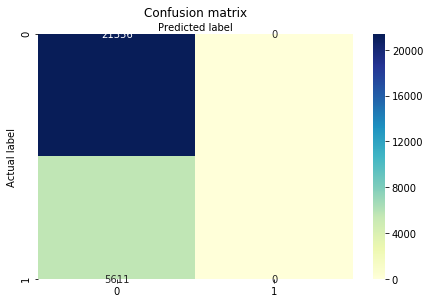

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')